In [2]:
#NOTEBOOK IMPORTS
from sklearn.datasets import load_boston         

import pandas as pd                              
import numpy as np 

import matplotlib.pyplot as plt                  
import seaborn as sns                           

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
%matplotlib inline   

## 1) GATHER DATA
[Source : Original Research Paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [3]:
boston_dataset = load_boston() 

In [5]:
boston_dataset 

sklearn.utils.Bunch

In [6]:
data=pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## 2) CLEANING THE DATA
### CHECKING FOR MISSING VALUES

In [7]:
pd.isnull(data) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

## 3) EXPLORING THE DATA

In [9]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [10]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
boston_dataset.data.shape

(506, 13)

In [13]:
#the various features determining the housing price 
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [59]:
#the prices are given in target in 000s dollars
boston_dataset.target    

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [15]:
#creating a dataframe with data and col_name as set below and storing this dataframe into a variable data
data=pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)

#adding the price col to the dataframe which is stored in a separate attribute target
data['PRICE']=boston_dataset.target

In [16]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [18]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 4) VISUALIZING THE DATA

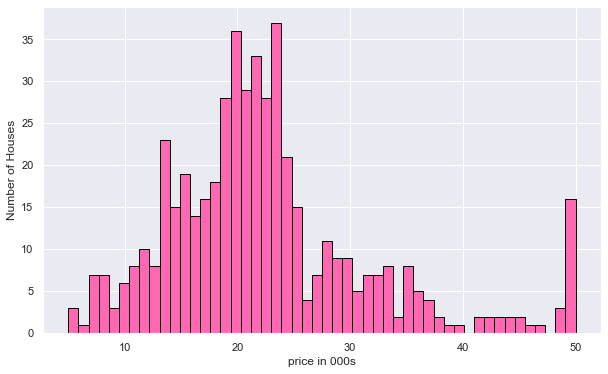

In [61]:
#plotting histogram b/w price(target) and no of houses
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'],bins=50,ec='black',color='hotpink')
plt.xlabel('price in 000s')
plt.ylabel('Number of Houses')
plt.show()

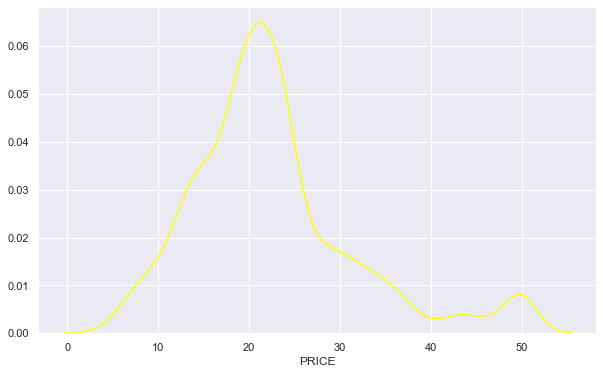

In [62]:
#plotting the above grpah using seaborn
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'],color='yellow',bins=50,kde=True,hist=False)
plt.show()

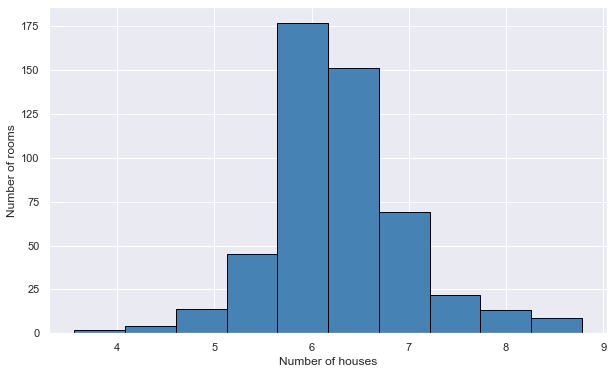

In [60]:
#plotting histogram b/w no of houses and no of rooms
plt.figure(figsize=(10,6))
plt.hist(data['RM'],color="steelblue",ec='black')
plt.xlabel('Number of houses')
plt.ylabel('Number of rooms')
plt.show()

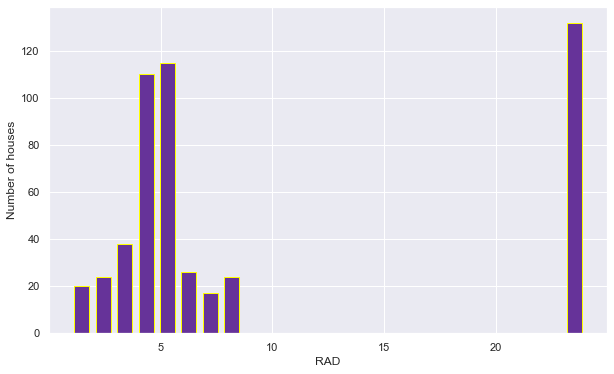

In [63]:
#RAD is the index of accessibility to highway: the higher the value of this index=>better accessibility
#plotting the graph between RAD and no of houses
plt.figure(figsize=(10,6))
plt.hist(data['RAD'],ec='yellow',color='#663399',bins=24,rwidth=0.7)
plt.xlabel('RAD')
plt.ylabel('Number of houses')
plt.show()

In [23]:
data['RAD'].value_counts()      
#get distinct values of indexes
#to grab the 1st col down here: use frequency.index

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [24]:
#potting the graph like below for the indexed values is better
frequency=data['RAD'].value_counts()                           
#this returns the distinct values : here distinct index values

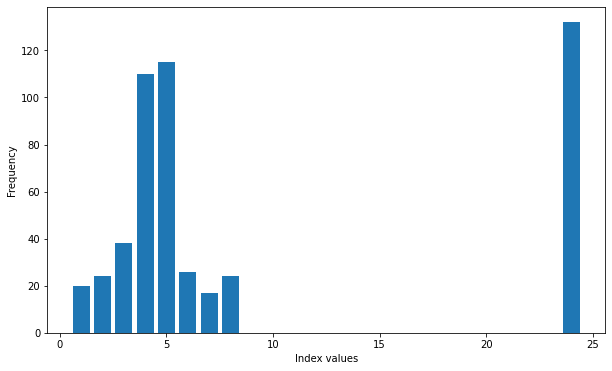

In [25]:
#plotting the bar graph for the above series produced
plt.figure(figsize=(10,6))
plt.xlabel('Index values')
plt.ylabel('Frequency')
plt.bar(frequency.index,height=frequency)
plt.show()

In [26]:
data['CHAS'].value_counts() 
#indexes whose value is either of two is called dummy variable ; here the value can be either 1 or 0 therefore 'chas' is a dummy variable


0.0    471
1.0     35
Name: CHAS, dtype: int64

In [64]:
#this gives all the descriptive measures like mean,min,mx etc. as a table 
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [65]:
#this gives the corr b/w two features
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [29]:
mask = np.zeros_like(data.corr())                                  #create a array with same dimensions as that of the data.corr() table ,that is, 14X14 matrix with all values set as zero and this matrix is stored in the var name:mask
triangle_indices=np.triu_indices_from(mask)                        #selects the upper triangle indices from the mask matrix and stores it in the var:triangle_indices 
mask[triangle_indices]=True                                        #using the above var, we set the values in the upper triangle of the mask matrix as true
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

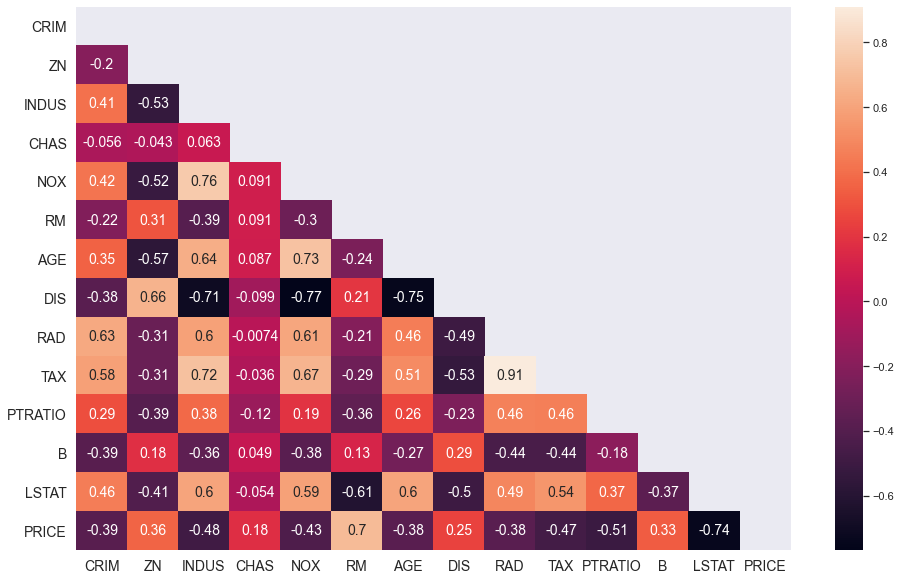

In [66]:
#plotting a heatmap between the various features , the color variation shows the strength of the corr
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":14})
plt.show()

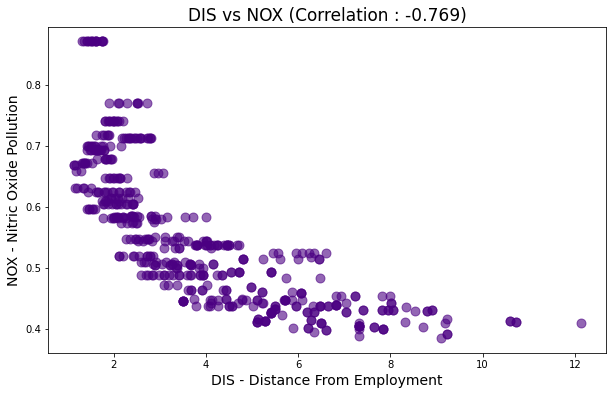

In [31]:
#Scatter plot between pollution(NOX) and distance from employment centres(DIS)
#created a var 'nox_dis_corr' and storing the corr value b/w NOX and DIS and putting it up in the graph title
nox_dis_corr=round(data['NOX'].corr(data['DIS']),3)
plt.figure(figsize=(10,6))
plt.title(f'DIS vs NOX (Correlation : {nox_dis_corr})',fontsize=17) 
plt.xlabel('DIS - Distance From Employment',fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution',fontsize=14)
plt.scatter(data['DIS'],data['NOX'],alpha=0.6,color='indigo',s=80)
plt.show()

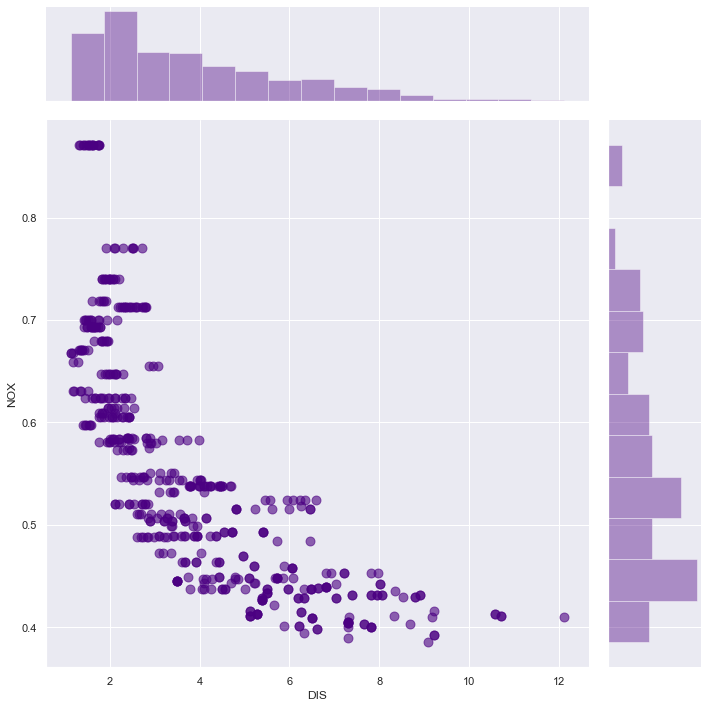

In [32]:
#the same task in above cell is done here using seaborn(sns) : plot b/w DIS and NOX
sns.set()
sns.set_style('darkgrid')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=10,color='indigo',joint_kws={'alpha':0.6},s=80)
plt.show()


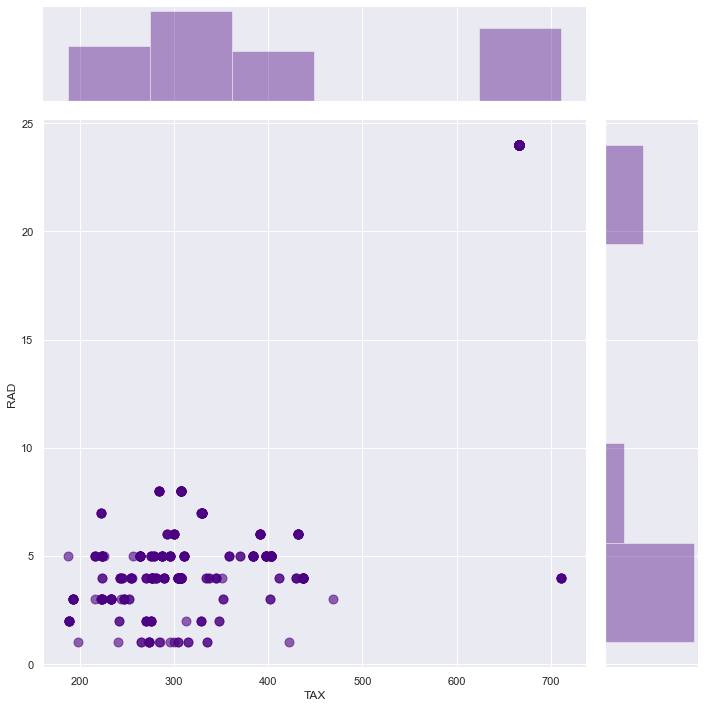

In [33]:
#plot b/w TAX and RAD using seaborn
sns.set()
sns.set_style('darkgrid')
sns.jointplot(x=data['TAX'],y=data['RAD'],height=10,color='indigo',joint_kws={'alpha':0.6},s=80)
plt.show()

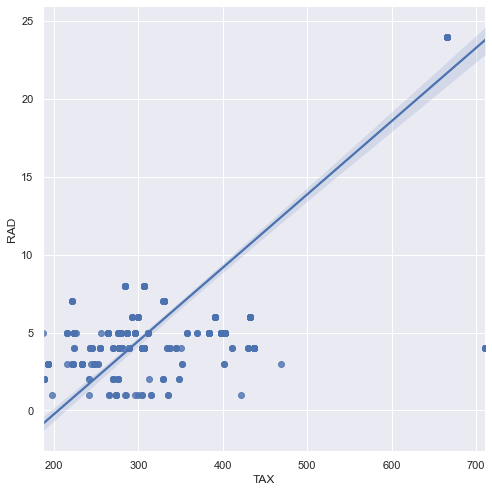

In [67]:
#scatter plotting + linear regression line using seaborn
sns.lmplot(x='TAX',y='RAD',data=data,height=7)
plt.show()

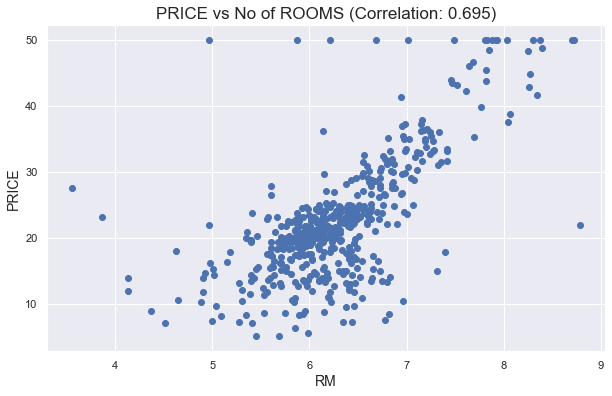

In [69]:
#plotting graph b/w rm and price
rm_price_corr=round(data['RM'].corr(data['PRICE']),3)
plt.figure(figsize=(10,6))
plt.title(f'PRICE vs No of ROOMS (Correlation: {rm_price_corr})',fontsize=17)
plt.ylabel('PRICE',fontsize=14)
plt.xlabel('RM',fontsize=14)
plt.scatter(data['RM'],data['PRICE'])
plt.show()

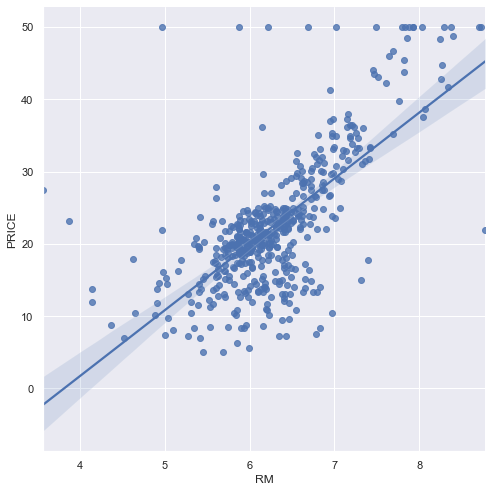

In [70]:
# the above same thing is achieved using seaborn with a regr line also
sns.lmplot(x='RM',y='PRICE',data=data,height=7)
plt.show()

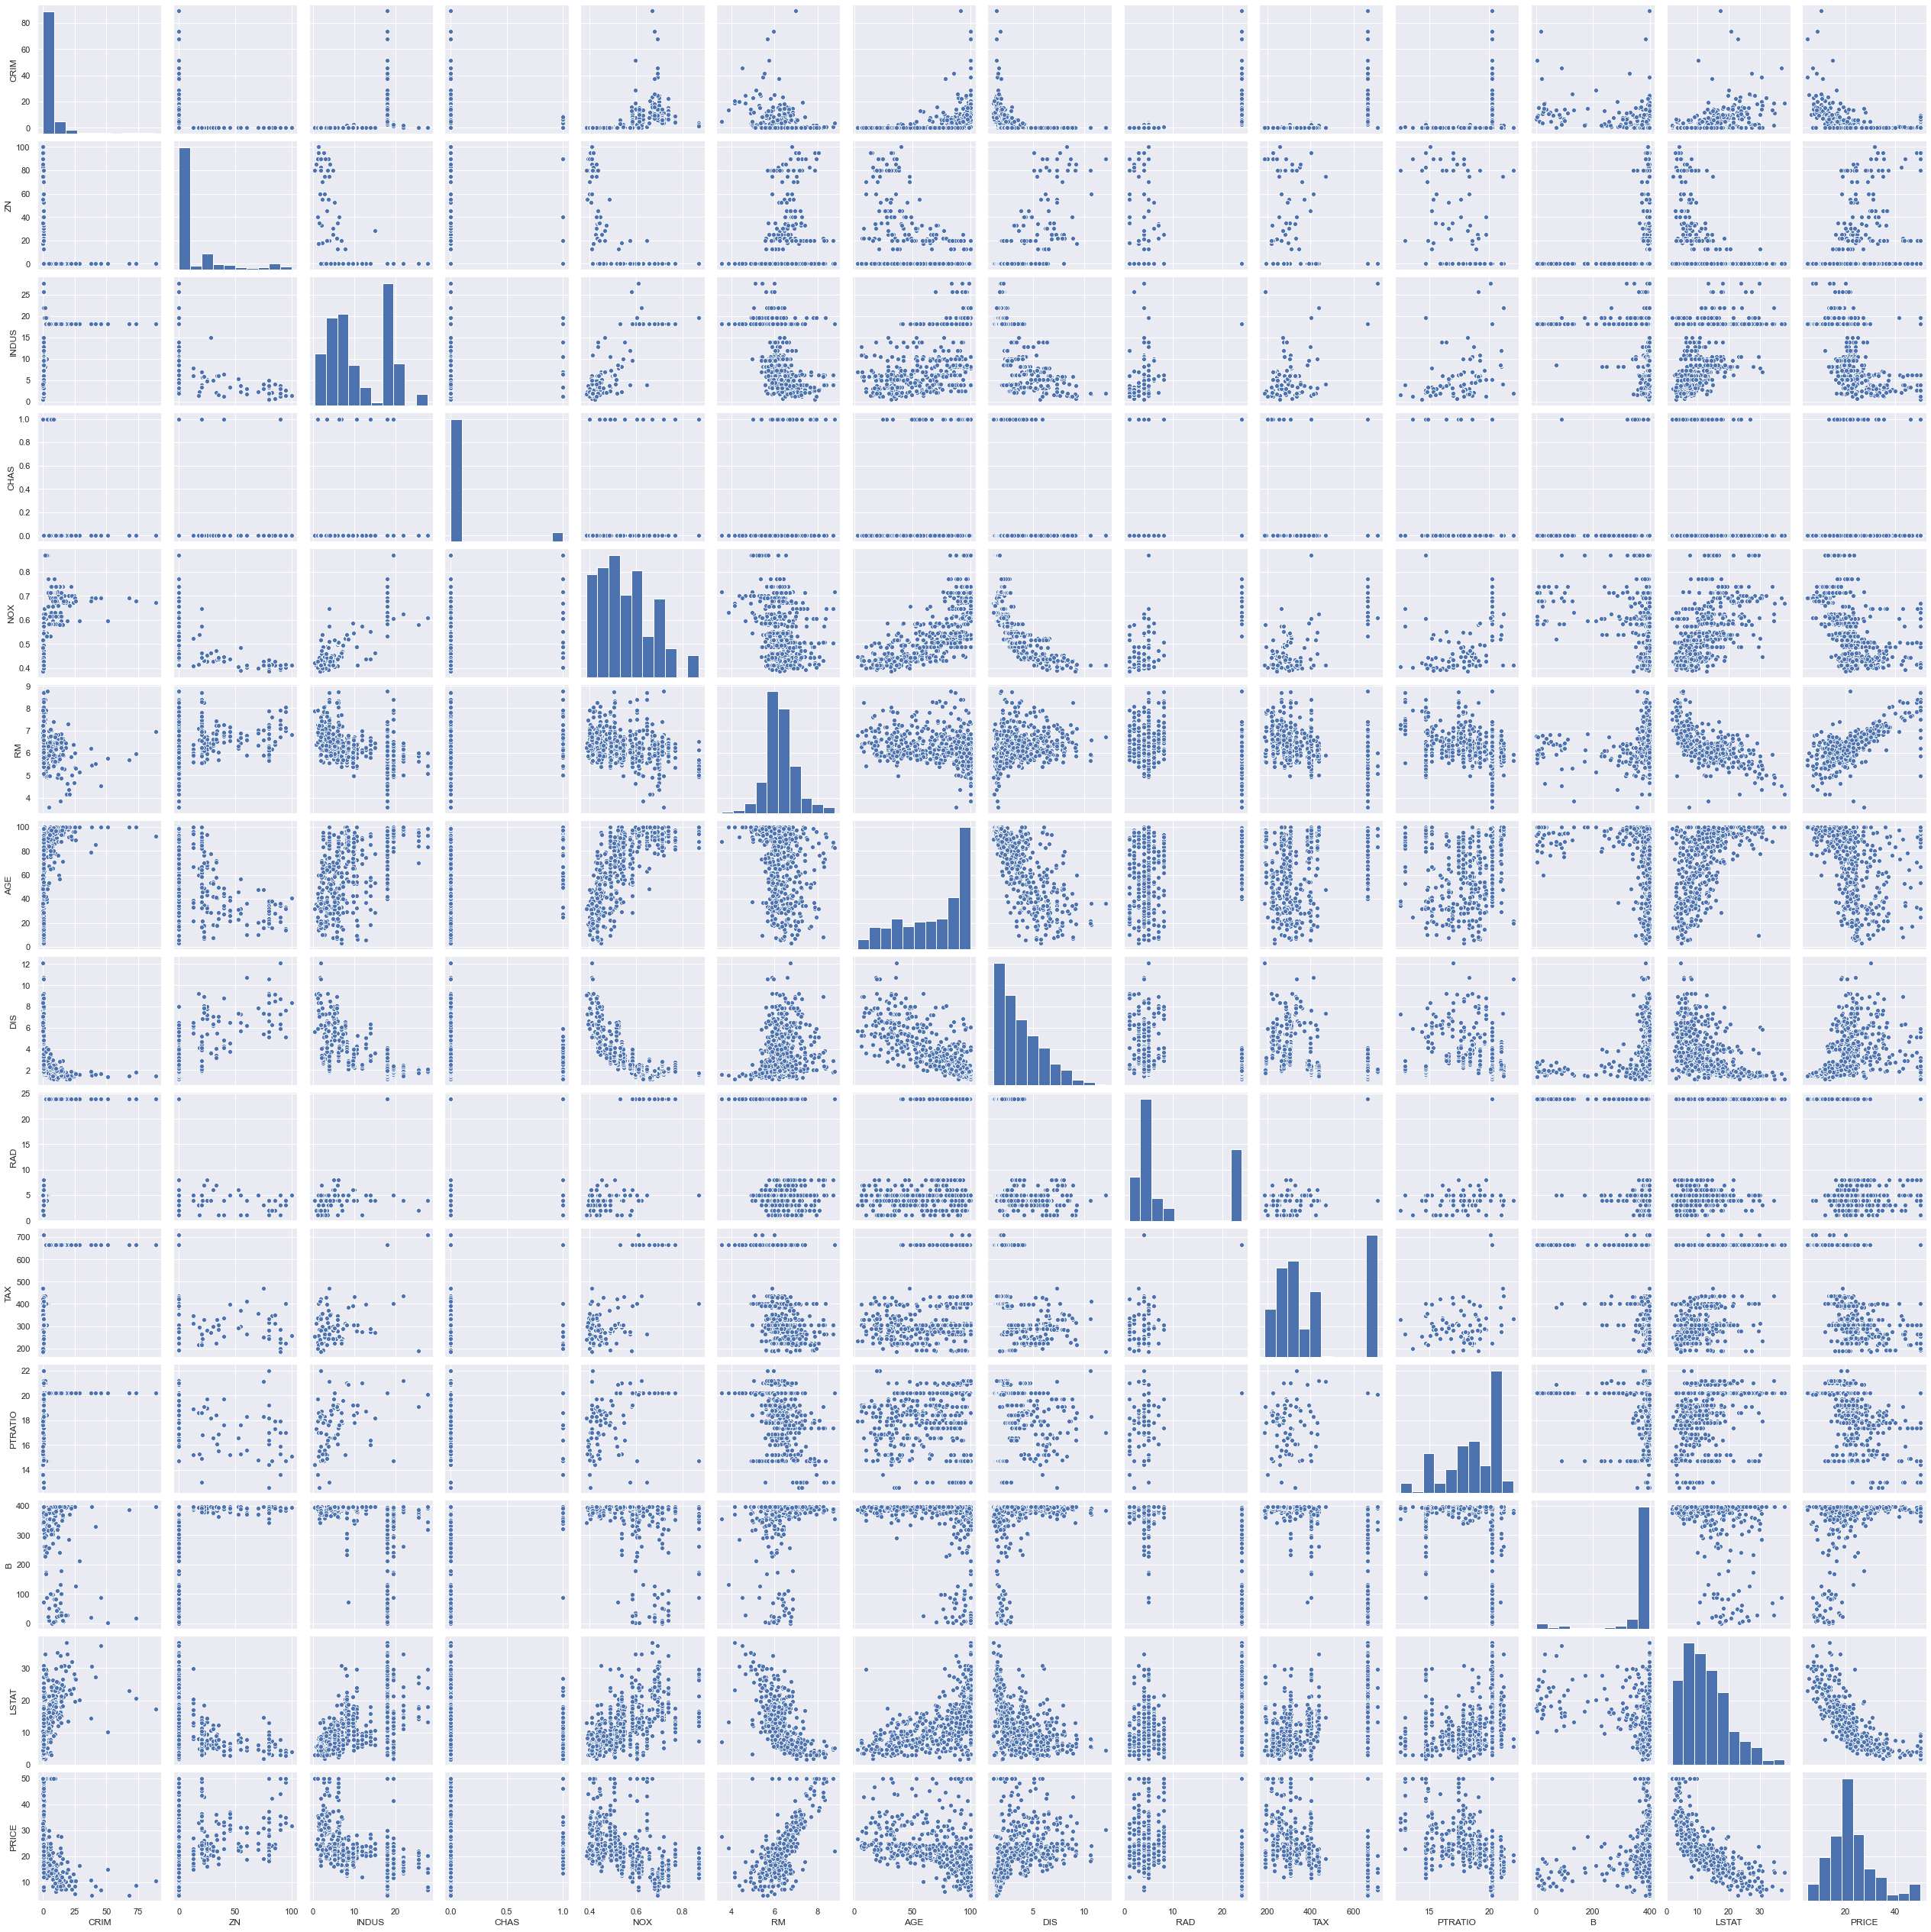

In [37]:
#plotting all the 14X14 combination of features 
sns.pairplot(data)
plt.show()

## 5) TRAINING THE MODEL

In [38]:
prices =data['PRICE']
features = data.drop('PRICE',axis=1) #new dataset with price col removed 

#X_train=80% of the features dataset to be the trained dataset
#X_test=20% of the features dataset to be the test dataset 
#y_train=80% of the prices dataset to be the trained dataset
#y_test=20% of the features dataset to be the test dataset

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)
#test_size divides the dataset into 80(train):20(test)

In [39]:
regr=LinearRegression()
regr.fit(X_train,y_train)

print('Training data r-squared: ',regr.score(X_train,y_train))
print('Test data r-squared: ',regr.score(X_test,y_test))
print('Intercept :',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coef'])

Training data r-squared:  0.750121534530608
Test data r-squared:  0.6709339839115628
Intercept : 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## 6) EVALUATION AND DEPLOYMENT

In [40]:
data['PRICE'].skew()

1.1080984082549072

In [41]:
y_log = np.log(data['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [42]:
y_log.skew()

-0.33032129530987864

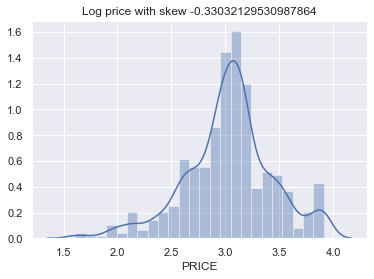

In [43]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

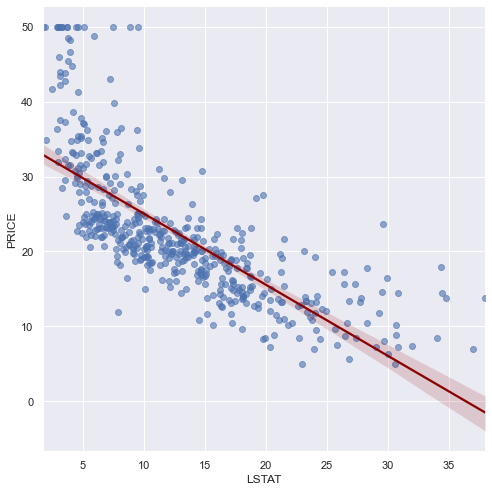

In [44]:
sns.lmplot(x='LSTAT',y='PRICE',data=data,height=7,
           scatter_kws={'alpha':0.6},
           line_kws={'color':'darkred'})
plt.show()

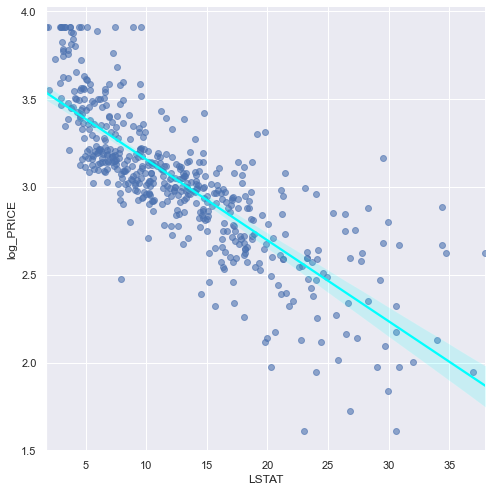

In [45]:
transformed_data=features
transformed_data['log_PRICE']=y_log
sns.lmplot(x='LSTAT',y='log_PRICE',data=transformed_data,height=7,
           scatter_kws={'alpha':0.6},
           line_kws={'color':'cyan'})
plt.show()

In [46]:
prices =np.log(data['PRICE'])
features = data.drop('PRICE',axis=1) #new dataset with price col removed 

#X_train=80% of the features dataset to be the trained dataset
#X_test=20% of the features dataset to be the test dataset 
#y_train=80% of the prices dataset to be the trained dataset
#y_test=20% of the features dataset to be the test dataset

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)
#test_size divides the dataset into 80(train):20(test)


regr=LinearRegression()
regr.fit(X_train,y_train)

print('Training data r-squared: ',regr.score(X_train,y_train))
print('Test data r-squared: ',regr.score(X_test,y_test))
print('Intercept :',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coef'])

Training data r-squared:  0.7930234826697583
Test data r-squared:  0.7446922306260724
Intercept : 4.05994387177519


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [47]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model= sm.OLS(y_train,X_incl_const)
results = model.fit()

org_coef=pd.DataFrame({'coef':results.params,'p-value':round(results.pvalues,3)})
print('BIC is ',results.bic)
print('r-squared is ',results.rsquared)

BIC is  -139.74997769478875
r-squared is  0.7930234826697582


In [48]:
# Reduced model with log prices and minus INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'],axis=1)

model= sm.OLS(y_train,X_incl_const)
results = model.fit()
coef_minus_indus=pd.DataFrame({'coef':results.params,'p-value':round(results.pvalues,3)})
print('BIC is ',results.bic)
print('r-squared is ',results.rsquared)

BIC is  -145.14508855591163
r-squared is  0.7927126289415163


In [49]:
# Reduced model with log prices and all features

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS','AGE'],axis=1)

model= sm.OLS(y_train,X_incl_const)
results = model.fit()

reduced_coef=pd.DataFrame({'coef':results.params,'p-value':round(results.pvalues,3)})
print('BIC is ',results.bic)
print('r-squared is ',results.rsquared)

BIC is  -149.49934294224656
r-squared is  0.7918657661852815


In [50]:
frames=[org_coef,coef_minus_indus,reduced_coef]
pd.concat(frames,axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


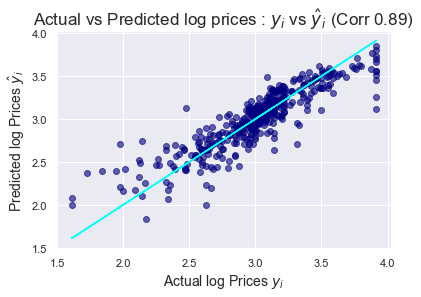

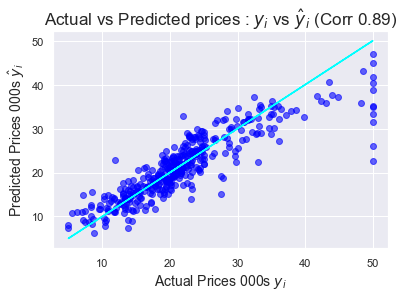

In [51]:
# Modified model : transformed (using log prices) & simplified (dropping two features)
prices=np.log(data['PRICE'])
features=data.drop(['PRICE','INDUS','AGE'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

# Using Statsmodel to analayse the residuals
X_incl_const = sm.add_constant(X_train)
model= sm.OLS(y_train,X_incl_const)
results = model.fit()

# Residuals 
#residuals is of type series
#this : 'residuals = y_train - results.fittedvalues' can be achieved using statsmodel func as
#results.resid

#Graph of Actual vs Predicted log Prices
corr =round( y_train.corr(results.fittedvalues),2)#high=>good
plt.scatter(y_train,results.fittedvalues, c='navy',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')
plt.xlabel('Actual log Prices $y _i$',fontsize=14)
plt.ylabel('Predicted log Prices $\hat y _i$',fontsize=14)
plt.title(f'Actual vs Predicted log prices : $y _i$ vs $\hat y _i$ (Corr {corr})' ,fontsize=17)
plt.show()

#Graph of Actual vs Predicted Prices
corr =round( y_train.corr(results.fittedvalues),2)#high=>good
plt.scatter(np.e**y_train,np.e**results.fittedvalues, c='blue',alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train,color='cyan')
plt.xlabel('Actual Prices 000s $y _i$',fontsize=14)
plt.ylabel('Predicted Prices 000s $\hat y _i$',fontsize=14)
plt.title(f'Actual vs Predicted prices : $y _i$ vs $\hat y _i$ (Corr {corr})' ,fontsize=17)
plt.show()

# residuals is how far the points are from the cyan line
# the cyan line shows that : not the best fit line for the scatter , 
# it shows points where they should have been of the predictions were perfect and residuals were 0
# in both the graphs, the points are closer to the cyan line ==>good prediction and it justifies our high r-squared value

# problem : as we can see from both the graphs, there is outliers at the house price of 50(high residuals), we had also seen this when we plotted the bar graph


#Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid,3)
reduced_log_rsquared = round(results.rsquared,3)

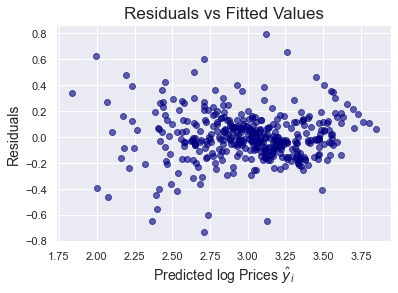

In [52]:
#Residuals vs Predicted values
# the plot of residuals shouldn't have any patterns ,here we are having no identifiable pattern ==>good
plt.scatter(x=results.fittedvalues,y=results.resid, c='navy',alpha=0.6)

plt.xlabel('Predicted log Prices $\hat y _i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residuals vs Fitted Values' ,fontsize=17)
plt.show()

#the points are located more around the 0 value along the y axis (residual point value are more 0)
#problem ==>the high prices(around 50) are still posing problem as seen at the top right corner forming a straight lin

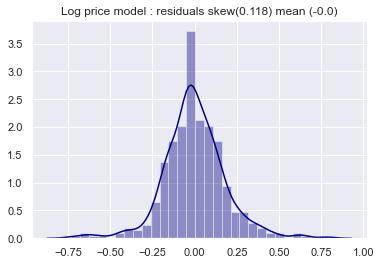

In [53]:
# Distribution of Residuals (log prices) = checking for normality
# The residuals(property II) should have normal distribution ==> mean=0 and skew =0
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3) # we are getting a skew of ~0 since we have transformed data (log values)

sns.distplot(results.resid,color='navy')
plt.title(f'Log price model : residuals skew({resid_skew}) mean ({resid_mean})')
plt.show()

#problem : the tails of the normal dist are longer than it should be

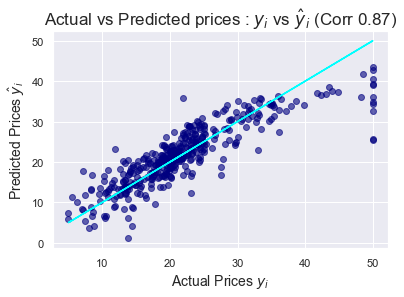

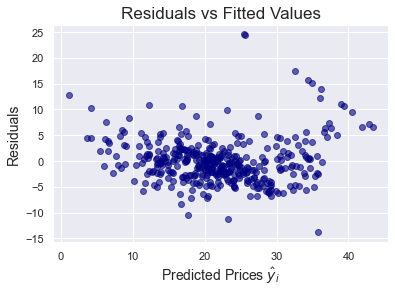

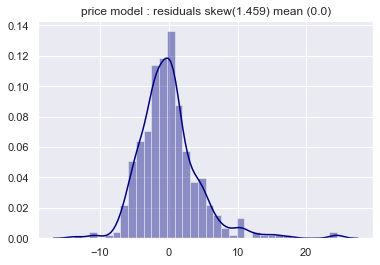

In [54]:
# UnModified Orignial model 
prices1=data['PRICE']
features1=data.drop(['PRICE'],axis=1)

X_train1,X_test1,y_train1,y_test1 = train_test_split(features1,prices1,test_size=0.2,random_state=10)

# Using Statsmodel to analayse the residuals
X_incl_const1 = sm.add_constant(X_train1)
model1= sm.OLS(y_train1,X_incl_const1)
results1 = model1.fit()

#Graph of Actual vs Predicted Prices
corr1 =round( y_train1.corr(results1.fittedvalues),2)
plt.scatter(y_train1,results1.fittedvalues, c='navy',alpha=0.6)
plt.plot(y_train1,y_train1,color='cyan')
plt.xlabel('Actual Prices $y _i$',fontsize=14)
plt.ylabel('Predicted Prices $\hat y _i$',fontsize=14)
plt.title(f'Actual vs Predicted prices : $y _i$ vs $\hat y _i$ (Corr {corr1})' ,fontsize=17)
plt.show()

#Residuals vs Predicted values
plt.scatter(results1.fittedvalues,results1.resid, c='navy',alpha=0.6)
plt.xlabel('Predicted Prices $\hat y _i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residuals vs Fitted Values' ,fontsize=17)
plt.show()

#distribution of residuals
resid_mean1 = round(results1.resid.mean(),3)
resid_skew1 = round(results1.resid.skew(),3) # we are getting a skew of ~0 since we have transformed data (log values)
sns.distplot(results1.resid,color='navy')
plt.title(f'price model : residuals skew({resid_skew1}) mean ({resid_mean1})')
plt.show()

#Mean Squared Error & R-Squared
full_normal_mse = round(results1.mse_resid,3)
full_normal_rsquared = round(results1.rsquared,3)

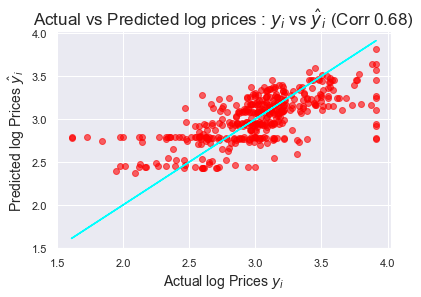

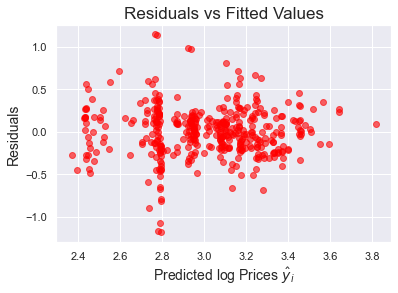

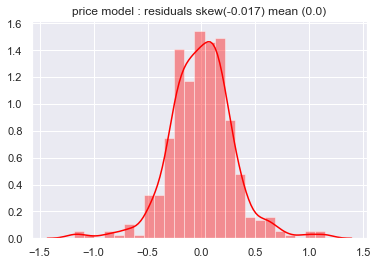

In [55]:
# Model Omitting Key Features using log prices 
prices2=np.log(data['PRICE'])
features2=data.drop(['PRICE','INDUS','AGE','LSTAT','RM','NOX','CRIM'],axis=1)

X_train2,X_test2,y_train2,y_test2 = train_test_split(features2,prices2,test_size=0.2,random_state=10)

# Using Statsmodel to analayse the residuals
X_incl_const2 = sm.add_constant(X_train2)
model2= sm.OLS(y_train2,X_incl_const2)
results2 = model2.fit()

#Graph of Actual vs Predicted log Prices along Omitting Key Features using log prices 
corr2 =round( y_train2.corr(results2.fittedvalues),2)
plt.scatter(y_train2,results2.fittedvalues, c='red',alpha=0.6)
plt.plot(y_train2,y_train2,color='cyan')
plt.xlabel('Actual log Prices $y _i$',fontsize=14)
plt.ylabel('Predicted log Prices $\hat y _i$',fontsize=14)
plt.title(f'Actual vs Predicted log prices : $y _i$ vs $\hat y _i$ (Corr {corr2})' ,fontsize=17)
plt.show()

#Residuals vs Predicted values along Omitting Key Features using log prices
plt.scatter(results2.fittedvalues,results2.resid, c='red',alpha=0.6)
plt.xlabel('Predicted log Prices $\hat y _i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residuals vs Fitted Values' ,fontsize=17)
plt.show()

#distribution of residuals along Omitting Key Features using log prices
resid_mean2 = round(results2.resid.mean(),3)
resid_skew2 = round(results2.resid.skew(),3) # we are getting a skew of ~0 since we have transformed data (log values)
sns.distplot(results2.resid,color='red')
plt.title(f'price model : residuals skew({resid_skew2}) mean ({resid_mean2})')
plt.show()

#Mean Squared Error & R-Squared
omitted_var_mse = round(results2.mse_resid,3)
omitted_var_rsquared = round(results2.rsquared,3)

# The various measuring feautres value for our model

In [56]:
pd.DataFrame({'MSE':[reduced_log_mse,full_normal_mse,omitted_var_mse],
              'R-squared':[reduced_log_rsquared,full_normal_rsquared,omitted_var_rsquared],
              'RMSE':np.sqrt([reduced_log_mse,full_normal_mse,omitted_var_mse])
              },
               index=['Reduced Log Model','Full Normal Price Model','Omitted Var Model'])

,MSE,R-squared,RMSE
Reduced Log Model,0.035,0.792,0.187083
Full Normal Price Model,19.921,0.750,4.463295
Omitted Var Model,0.090,0.460,0.300000


# Predicting price using valuation tool developed

In [57]:
import Boston_Valuation as val
val.get_dollar_estimate(2,30,True)

The estimated property value is 252000.0.
At 95% confidence the valuation range is
USD 173000.0 at the lower end to USD 366000.0 at the high end.
